In [3]:
import numpy as np
import matplotlib.pyplot as plt

"""
First we need some data for visualisation

These signals were takes from mocap data in fewshot_database.npz from
https://github.com/ianxmason/Fewshot_Learning_of_Homogeneous_Human_Locomotion_Styles

with open('fewshot_database.npz', 'rb') as f:
    data = np.load(f)['Xin']
    w = ((60 * 2) // 10)
    data = data[:, w * 56:]  # pos and vel for 31 joints
    start = 300
    end = start + 121
    signal_one = data[start:end, 95]
    signal_two = data[start:end, 100]
    signal_three = data[start:end, 179]
    signal_four = data[start:end, 140]
    signal_five = data[start:end, 35]
"""


"\nFirst we need some data for visualisation\n\nThese signals were takes from mocap data in fewshot_database.npz from\nhttps://github.com/ianxmason/Fewshot_Learning_of_Homogeneous_Human_Locomotion_Styles\n\nwith open('fewshot_database.npz', 'rb') as f:\n    data = np.load(f)['Xin']\n    w = ((60 * 2) // 10)\n    data = data[:, w * 56:]  # pos and vel for 31 joints\n    start = 300\n    end = start + 121\n    signal_one = data[start:end, 95]\n    signal_two = data[start:end, 100]\n    signal_three = data[start:end, 179]\n    signal_four = data[start:end, 140]\n    signal_five = data[start:end, 35]\n"

In [29]:
import random

def shuffle_signal_segments(signal, num_segments=4):
    segment_length = len(signal) // num_segments
    segments = [signal[i*segment_length : (i+1)*segment_length] for i in range(num_segments)]
    
    # Đảo ngược thứ tự các đoạn
    shuffled_segments = segments[::-1]
    
    # Hoặc hoán vị ngẫu nhiên (bỏ comment dòng dưới nếu muốn)
    # random.shuffle(shuffled_segments)
    
    # Ghép lại
    shuffled_signal = [item for segment in shuffled_segments for item in segment]
    
    # Xử lý phần dư (nếu có) do chia không đều
    remainder = len(signal) % num_segments
    if remainder > 0:
        shuffled_signal += signal[-remainder:]
    
    return shuffled_signal

# Áp dụng cho từng tín hiệu
shuffled_one = shuffle_signal_segments(signal_one)
shuffled_two = shuffle_signal_segments(signal_two)
shuffled_three = shuffle_signal_segments(signal_three)
shuffled_four = shuffle_signal_segments(signal_four)
shuffled_five = shuffle_signal_segments(signal_five)

# In kết quả (ví dụ với signal_one)
print("Signal_one gốc:", signal_one[:5], "...", signal_one[-5:])
print("Signal_one đảo đoạn:", shuffled_one[:5], "...", shuffled_one[-5:])

Signal_one gốc: [0.01872, 0.0187, 0.01866, 0.01863, 0.01884] ... [0.0233, 0.02268, 0.02199, 0.02141, 0.02102]
Signal_one đảo đoạn: [0.0148, 0.01491, 0.01517, 0.01565, 0.01622] ... [0.01468, 0.01454, 0.01451, 0.01454, 0.02102]


In [1]:
signal_one = [0.01872, 0.0187, 0.01866, 0.01863, 0.01884, 0.01927, 0.01962, 0.01968, 0.01954, 0.01947, 0.0193, 0.01914,
              0.01886, 0.01856, 0.01823, 0.01799, 0.01773, 0.01754, 0.01743, 0.01728, 0.01698, 0.01652, 0.01611,
              0.01567, 0.01534, 0.01503, 0.01468, 0.01454, 0.01451, 0.01454, 0.01464, 0.01487, 0.01495, 0.01511,
              0.01534, 0.01536, 0.01539, 0.01563, 0.01584, 0.01617, 0.01662, 0.01709, 0.0175, 0.0181, 0.01853, 0.01905,
              0.01963, 0.02021, 0.02097, 0.02195, 0.02256, 0.02287, 0.02305, 0.02344, 0.02368, 0.02383, 0.02382,
              0.02361, 0.02292, 0.02202, 0.0212, 0.02058, 0.01987, 0.019, 0.01803, 0.0171, 0.01615, 0.01524, 0.01457,
              0.01394, 0.01339, 0.01278, 0.01231, 0.01208, 0.01193, 0.01185, 0.01188, 0.01215, 0.01247, 0.01283,
              0.01305, 0.01322, 0.01339, 0.01376, 0.01406, 0.01419, 0.01436, 0.01458, 0.01461, 0.01467, 0.0148,
              0.01491, 0.01517, 0.01565, 0.01622, 0.0167, 0.01711, 0.01755, 0.01808, 0.01856, 0.0192, 0.01987,
              0.02051, 0.02123, 0.02231, 0.02336, 0.02415, 0.02453, 0.02444, 0.02414, 0.02427, 0.02483, 0.02534,
              0.02551, 0.0251, 0.0242, 0.0233, 0.02268, 0.02199, 0.02141, 0.02102]
signal_two = [-0.00448, -0.00504, -0.00417, -0.00226, -0.00092, -0.00049, -3e-05, 0.00099, 0.00226, 0.0034, 0.00408,
              0.00435, 0.00428, 0.00395, 0.00341, 0.00278, 0.00206, 0.00146, 0.00098, 0.00067, 0.00037, 3e-05, -0.00029,
              -0.00047, -0.00062, -0.00082, -0.00113, -0.00127, -0.00119, -0.00131, -0.00179, -0.00206, -0.00201,
              -0.0018, -0.00154, -0.00106, -0.00042, 0.00024, 0.00068, 0.00076, 0.00054, 0.00032, 0.0, -0.00036,
              -0.00078, -0.00113, -0.00156, -0.00211, -0.00266, -0.00274, -0.0016, 1e-04, 0.00091, 0.00095, 0.00118,
              0.00181, 0.00216, 0.00213, 0.00167, 0.00124, 0.00078, 0.00022, -0.00037, -0.00048, -0.00035, -0.00017,
              -5e-05, 0.00022, 0.00059, 0.00096, 0.00116, 0.00135, 0.00152, 0.00153, 0.00127, 0.001, 0.00078, 0.00069,
              0.00067, 0.0006, 0.00037, 0.00023, 0.00028, 0.00039, 0.00037, 0.00046, 0.00058, 0.00063, 0.00051, 0.00045,
              0.00049, 0.0007, 0.00084, 0.00073, 0.00026, -0.00021, -0.00034, -0.00042, -0.00069, -0.00122, -0.00164,
              -0.00211, -0.00263, -0.00335, -0.00385, -0.00372, -0.0027, -0.00114, 0.0003, 0.00079, 0.00068, 0.00062,
              0.00113, 0.00182, 0.00254, 0.00312, 0.00334, 0.00298, 0.00225, 0.00139, 0.00062]
signal_three = [0.02235, 0.02185, 0.02137, 0.0212, 0.02104, 0.02077, 0.02055, 0.02047, 0.02047, 0.02032, 0.01975,
                0.0195, 0.01924, 0.01888, 0.01857, 0.01886, 0.01898, 0.01879, 0.01871, 0.01879, 0.01867, 0.0183,
                0.01816, 0.01757, 0.01655, 0.01578, 0.01532, 0.01485, 0.01492, 0.01521, 0.01475, 0.01382, 0.01347,
                0.01386, 0.01412, 0.01431, 0.01442, 0.01471, 0.01492, 0.01523, 0.01542, 0.0159, 0.01693, 0.01781,
                0.01838, 0.01882, 0.01942, 0.02015, 0.02091, 0.02154, 0.02214, 0.02301, 0.02281, 0.0221, 0.02125, 0.021,
                0.02041, 0.01973, 0.01885, 0.01832, 0.01787, 0.01749, 0.01714, 0.01687, 0.01717, 0.01769, 0.01777,
                0.01751, 0.01766, 0.01736, 0.01617, 0.01477, 0.01344, 0.01181, 0.00979, 0.0077, 0.00619, 0.00499,
                0.00405, 0.00321, 0.00274, 0.00235, 0.00231, 0.00272, 0.00318, 0.00394, 0.0048, 0.00614, 0.00756,
                0.00877, 0.01007, 0.01146, 0.01322, 0.01462, 0.01633, 0.01775, 0.01911, 0.01979, 0.0209, 0.0217,
                0.02229, 0.0228, 0.0239, 0.02472, 0.02548, 0.0258, 0.02613, 0.0263, 0.0266, 0.02636, 0.02611, 0.02615,
                0.02652, 0.02584, 0.02467, 0.02409, 0.02325, 0.02232, 0.01811, 0.01757, 0.01998]
signal_four = [0.01734, 0.01746, 0.01791, 0.01862, 0.01889, 0.01877, 0.01841, 0.01814, 0.01792, 0.01758, 0.01749,
               0.0174, 0.0168, 0.01641, 0.01649, 0.01638, 0.01572, 0.01554, 0.01569, 0.01552, 0.01524, 0.01515, 0.01522,
               0.01529, 0.01545, 0.01547, 0.01533, 0.01557, 0.01624, 0.01663, 0.0164, 0.01661, 0.01725, 0.01738,
               0.01753, 0.01807, 0.01857, 0.01862, 0.01884, 0.01923, 0.0194, 0.01921, 0.01894, 0.01899, 0.01896,
               0.01886, 0.01895, 0.01913, 0.01923, 0.0195, 0.01966, 0.01968, 0.01963, 0.01944, 0.0188, 0.0181, 0.01766,
               0.01745, 0.01707, 0.01648, 0.01592, 0.01554, 0.01496, 0.01441, 0.01409, 0.01401, 0.01359, 0.01303,
               0.0128, 0.01302, 0.01318, 0.01292, 0.01274, 0.01264, 0.01255, 0.01255, 0.01279, 0.01277, 0.01259,
               0.01262, 0.01275, 0.01305, 0.01335, 0.01364, 0.01381, 0.01406, 0.0145, 0.01496, 0.01542, 0.01571,
               0.01614, 0.01661, 0.01725, 0.01752, 0.01771, 0.01799, 0.01827, 0.0185, 0.01908, 0.01955, 0.01981,
               0.02011, 0.02033, 0.02059, 0.021, 0.02143, 0.02163, 0.02192, 0.02199, 0.02204, 0.02196, 0.02205,
               0.02232, 0.0225, 0.02182, 0.0209, 0.02044, 0.02048, 0.0205, 0.02025, 0.02011]
signal_five = [-0.00066, -0.00051, -0.00058, -0.00081, -0.00099, -0.00089, -0.00048, 5e-05, 0.00045, 0.00081, 0.00111,
               0.0014, 0.00158, 0.00165, 0.00159, 0.00151, 0.00144, 0.00136, 0.00143, 0.00164, 0.00188, 0.00202, 0.00202,
               0.00186, 0.00163, 0.00136, 0.00091, 0.00046, 6e-05, -0.00031, -0.00057, -0.00064, -0.00072, -0.00078,
               -0.00073, -0.00076, -0.001, -0.00129, -0.00165, -0.00202, -0.00229, -0.00252, -0.00276, -0.00294,
               -0.00314, -0.00335, -0.00355, -0.00372, -0.00375, -0.00335, -0.00276, -0.00217, -0.00175, -0.00126,
               -0.00063, 0.00017, 0.00109, 0.00213, 0.00301, 0.00348, 0.00372, 0.004, 0.00433, 0.00461, 0.00479, 0.00478,
               0.00466, 0.00436, 0.00397, 0.00361, 0.00326, 0.00278, 0.00214, 0.00153, 0.00098, 0.00041, -0.00017,
               -0.00061, -0.00085, -0.00091, -0.00085, -0.00086, -0.00096, -0.00094, -0.00079, -0.00069, -0.0006,
               -0.0005, -0.00053, -0.0007, -0.00095, -0.00133, -0.00179, -0.00219, -0.00235, -0.00243, -0.0025, -0.00271,
               -0.0029, -0.00315, -0.00343, -0.00374, -0.004, -0.00421, -0.00409, -0.00345, -0.00249, -0.00154, -0.00093,
               -0.00087, -0.00101, -0.00073, 0.00013, 0.0013, 0.00245, 0.00321, 0.00342, 0.00333, 0.00302, 0.00256,
               0.00217]




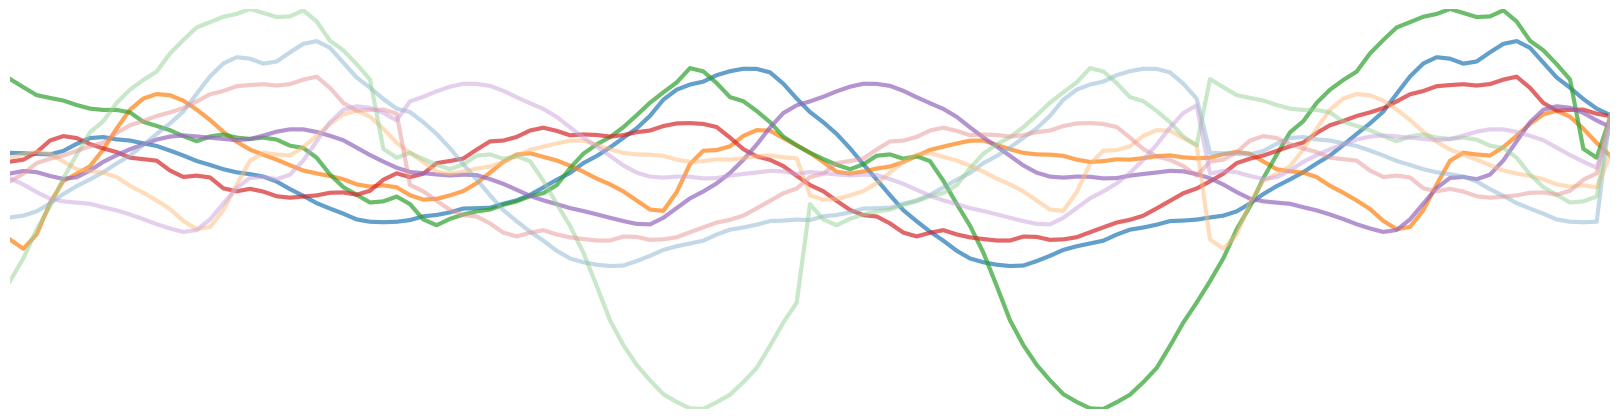

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Các tín hiệu gốc của bạn
signals = [signal_one, signal_two, signal_three, signal_four, signal_five, 
           shuffled_one, shuffled_two, shuffled_three, shuffled_four, shuffled_five]

time_window = 2
num_samples = 121
samples = np.linspace(0, time_window, num_samples)

# Tạo figure với kích thước rộng
plt.figure(figsize=(16, 4))

# Màu sắc cho các tín hiệu (5 màu chính và 5 màu nhạt hơn cho shuffled)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Màu cho tín hiệu gốc
shuffled_colors = ['#8ab4d1', '#ffbc7a', '#95d095', '#e89393', '#caa3dd']  # Màu nhạt hơn cho shuffled

# Kết hợp cả hai bảng màu
all_colors = colors + shuffled_colors

# Vẽ các tín hiệu chồng lấp
for i, signal in enumerate(signals):
    # Điều chỉnh tín hiệu để tập trung ở giữa
    centered_signal = signal - np.mean(signal)  # Chuẩn hóa về trung tâm
    plt.plot(samples, centered_signal, 
             color=all_colors[i],  # Sử dụng màu tương ứng
             linewidth=3,
             alpha=0.7 if i < 5 else 0.5)  # Độ trong suốt khác nhau để phân biệt

# Loại bỏ tất cả các thành phần thừa
plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)

# Lưu file ảnh
plt.savefig('centered_overlap_waves.png', 
            bbox_inches='tight', 
            pad_inches=0, 
            transparent=True, 
            dpi=300)

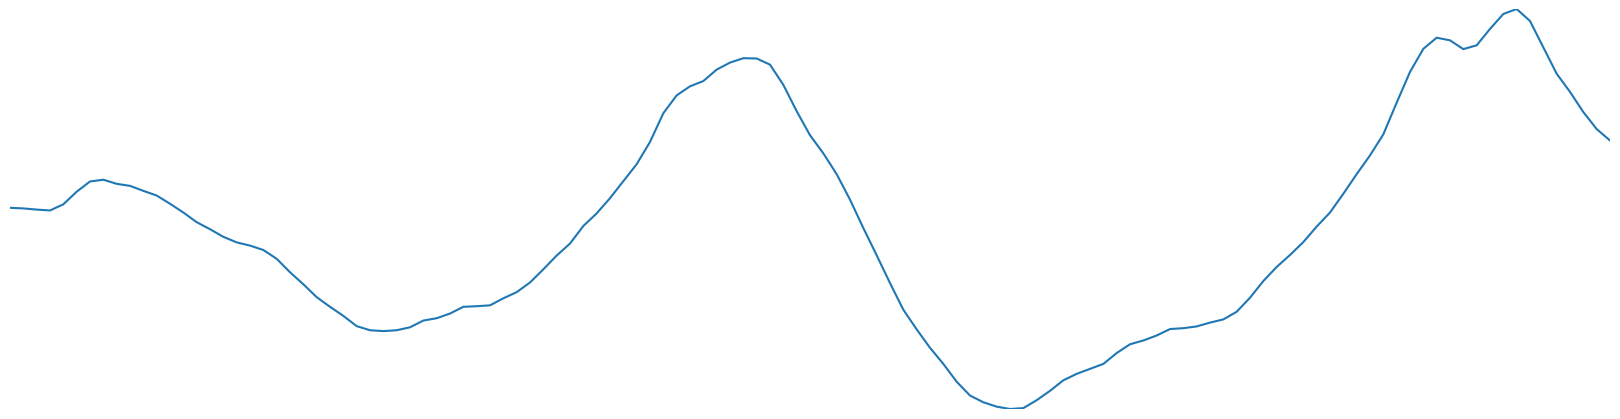

In [36]:
# Plot 2: Selected signal (just the wave, no extras)
plt.figure(figsize=(16, 4))
plt.plot(samples, signal, linewidth=1.5)  # Single wave
plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig('selected_signal.png', bbox_inches='tight', pad_inches=0, transparent=True)

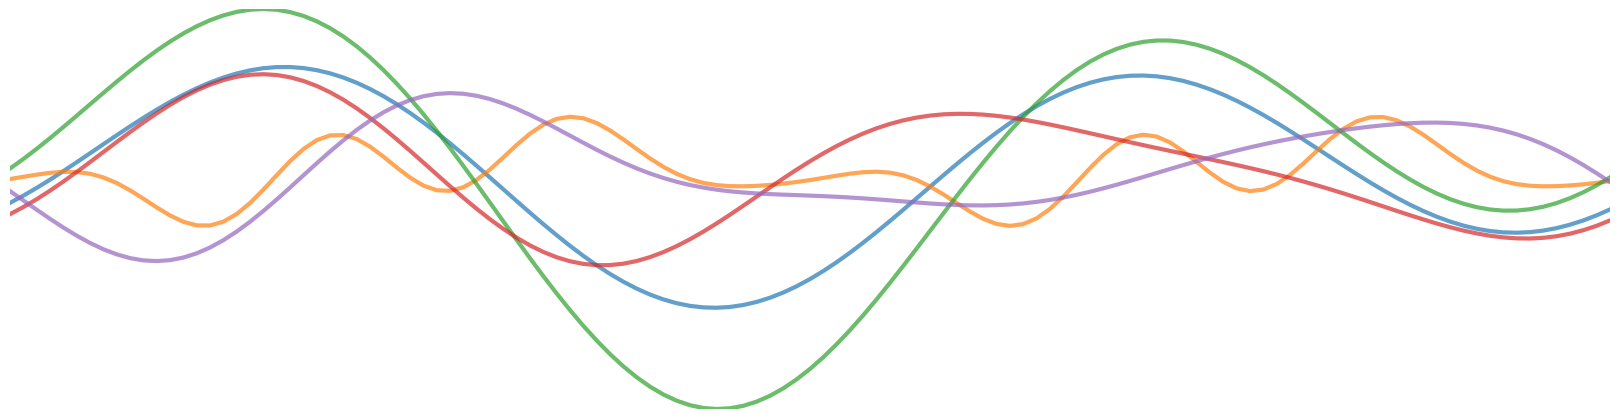

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Các tín hiệu gốc
signals = [shuffled_one, shuffled_two, shuffled_three, shuffled_four]
time_window = 2
num_samples = 121
samples = np.linspace(0, time_window, num_samples)

# Hàm chuyển đổi tín hiệu thành dạng sóng sin/cos
def convert_to_sine_wave(signal, num_components=5):
    n = len(signal)
    yf = fft(signal)
    
    # Giữ lại chỉ một số thành phần tần số chính
    yf_clean = np.zeros(n, dtype=complex)
    indices = np.argsort(np.abs(yf))[-num_components:]
    yf_clean[indices] = yf[indices]
    
    # Chuyển ngược về miền thời gian
    clean_signal = np.real(ifft(yf_clean))
    return clean_signal - np.mean(clean_signal)  # Chuẩn hóa về trung tâm

# Tạo figure
plt.figure(figsize=(16, 4))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Vẽ các tín hiệu đã được xử lý
for i, signal in enumerate(signals):
    sine_wave = convert_to_sine_wave(signal)
    plt.plot(samples, sine_wave, 
             color=colors[i],
             linewidth=3,
             alpha=0.7)

# Tùy chỉnh đồ thị
plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)

# Lưu file
plt.savefig('sine_wave_representation.png', 
            bbox_inches='tight', 
            pad_inches=0, 
            transparent=True, 
            dpi=300)
# plt.close()

AttributeError: Line2D.set() got an unexpected keyword argument 'lainewidth'

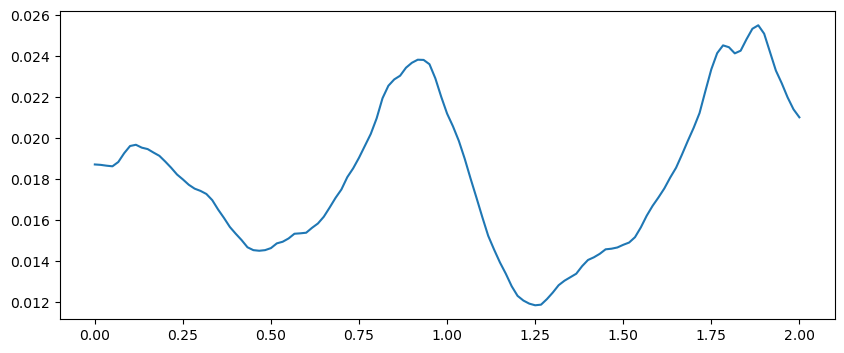

In [ ]:
signal = signal_one
time_window = 2
num_samples = 121
samples = np.linspace(0, time_window, num_samples)

# Plot 1: All signals (just waves, no axes or padding)
plt.figure(figsize=(10, 4))
plt.plot(samples, signal_one, linewidth=1.5)
plt.plot(samples, signal_two, lainewidth=1.5)
plt.plot(samples, signal_three, linewidth=1.5)
plt.plot(samples, signal_four, linewidth=1.5)
plt.plot(samples, signal_five, linewidth=1.5)
plt.axis('off')  # Removes all axes, ticks, labels
plt.gca().set_axis_off()  # Ensures no extra whitespace
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)  # Removes padding
plt.savefig('all_signals.png', bbox_inches='tight', pad_inches=0, transparent=True)
# plt.close()

# Plot 2: Selected signal (just the wave, no extras)
plt.figure(figsize=(10, 4))
plt.plot(samples, signal, linewidth=1.5)  # Single wave
plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig('selected_signal.png', bbox_inches='tight', pad_inches=0, transparent=True)
# plt.close()

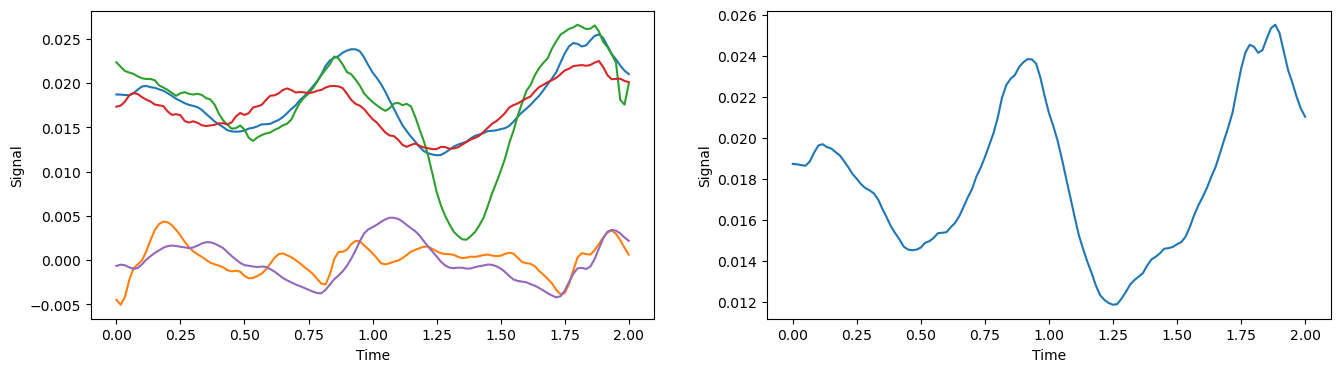

In [4]:
signal = signal_one
time_window = 2
num_samples = 121
samples = np.linspace(0, time_window, num_samples)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(samples, signal_one)
ax1.plot(samples, signal_two)
ax1.plot(samples, signal_three)
ax1.plot(samples, signal_four)
ax1.plot(samples, signal_five)
ax1.set_xlabel('Time')
ax1.set_ylabel('Signal')
ax2.plot(samples, signal)
ax2.set_xlabel('Time')
ax2.set_ylabel('Signal')
plt.savefig('latent_signals.png', bbox_inches='tight')


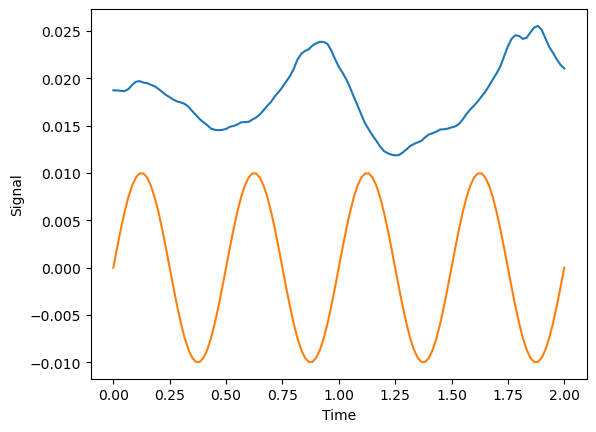

In [5]:

A = 0.01
F = 2
B = 0
P = 0
function = A * np.sin(2 * np.pi * (F * samples - P)) + B
plt.clf()
plt.plot(samples, signal)
plt.plot(samples, function)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.savefig('chosen_signal.png', bbox_inches='tight')


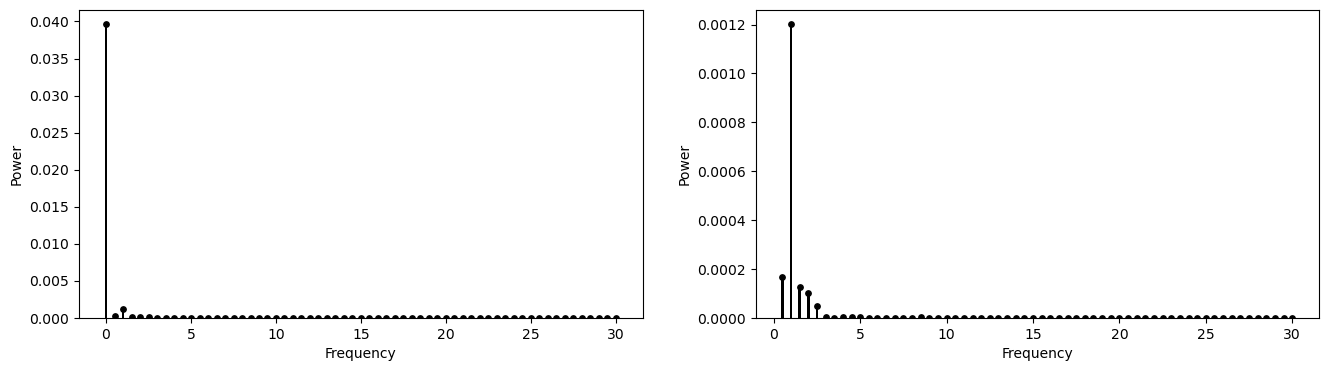

In [6]:

# Do dft
rfft = np.fft.rfft(signal)
freqs = np.fft.rfftfreq(num_samples, d=time_window / num_samples)

# Power spectrum
power = 2 * np.abs(rfft) ** 2 / num_samples
power[0] = power[0] / 2.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.bar(freqs[0:], power[0:], width=0.15, color='k')
ax1.scatter(freqs[0:], power[0:], color='k', s=15)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Power')
ax2.bar(freqs[1:], power[1:], width=0.15, color='k')
ax2.scatter(freqs[1:], power[1:], color='k', s=15)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power')
plt.savefig('power_spectrum.png', bbox_inches='tight')


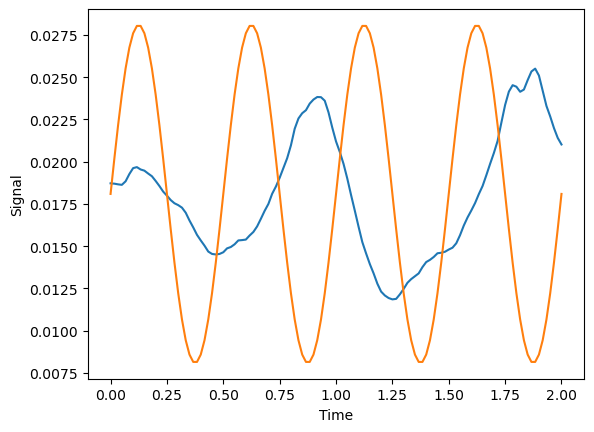

In [7]:

B = rfft[0].real / num_samples
function = A * np.sin(2 * np.pi * (F * samples - P)) + B
plt.clf()
plt.plot(samples, signal)
plt.plot(samples, function)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.savefig('signal_with_B.png', bbox_inches='tight')


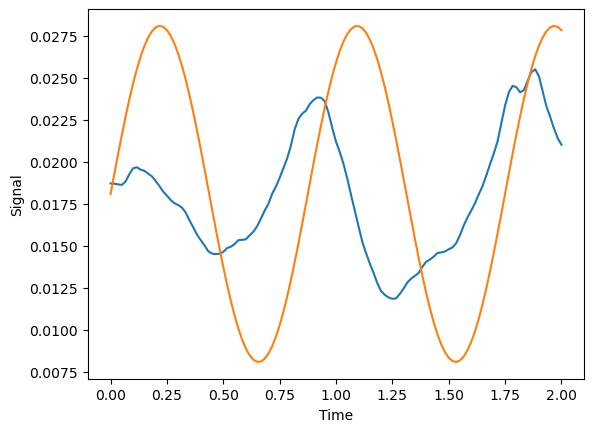

In [8]:

power = power[1:]
freqs = freqs[1:]
F = np.dot(freqs, power) / np.sum(power)
function = A * np.sin(2 * np.pi * (F * samples - P)) + B
plt.clf()
plt.plot(samples, signal)
plt.plot(samples, function)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.savefig('signal_with_F_B.png', bbox_inches='tight')


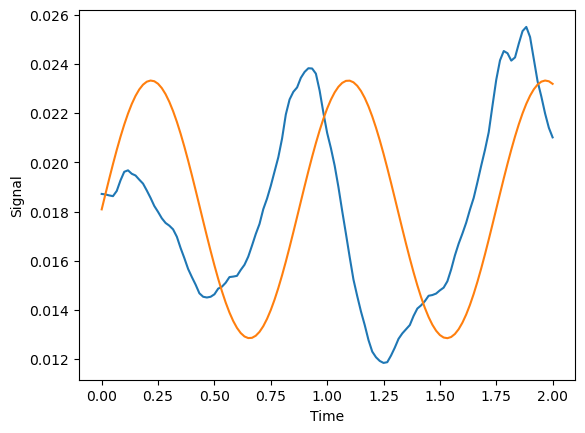

In [9]:

A = np.sqrt(2 / num_samples * np.sum(power))
function = A * np.sin(2 * np.pi * (F * samples - P)) + B
plt.clf()
plt.plot(samples, signal)
plt.plot(samples, function)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.savefig('signal_with_A_F_B.png', bbox_inches='tight')


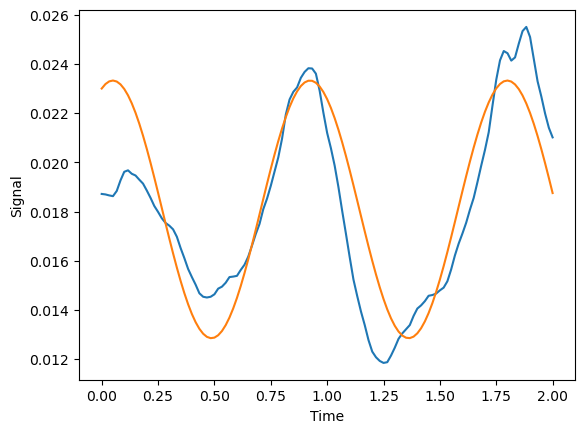

In [10]:

# New formula
P = np.arctan2(np.sum((signal - B) * np.sin(2 * np.pi * F * samples)),
               np.sum((signal - B) * np.cos(2 * np.pi * F * samples)))
plt.clf()
plt.plot(samples, signal)
plt.plot(samples, A * np.cos(2 * np.pi * F * samples - P) + B)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.savefig('reconstructed_signal.png', bbox_inches='tight')


In [11]:

# Simple conversion to work with the chosen formulation
P = (P - np.pi / 2.) / (2 * np.pi)
# function = A * np.sin(2 * np.pi * (F * samples - P)) + B
# plt.clf()
# plt.plot(samples, signal)
# plt.plot(samples, function, 'g')
# plt.xlabel('Time')
# plt.ylabel('Signal')
# plt.show()

print("Found Offset: {}".format(B))
print("Found Frequency: {}".format(F))
print("Found Amplitude: {}".format(A))
print("Found Phase: {}".format(P))

"""
To see the discontinuity in the phase spectrum try this plot for a simple function with endpoint=False & endpoint=True

time_window = 2
num_samples = 121
samples = np.linspace(0, time_window, num_samples, endpoint=False)
my_cosine = np.cos(2 * np.pi * samples)
plt.plot(samples, my_cosine)
plt.show()

# Do dft
rfft = np.fft.rfft(my_cosine)
freqs = np.fft.rfftfreq(num_samples, d=time_window / num_samples)

phase = np.arctan2(rfft.imag[1:], rfft.real[1:]) / (2 * np.pi) * 360
plt.clf()
plt.plot(freqs[1:], phase, c='g')
plt.scatter(freqs[1:], phase, c='g', s=15)
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.show()
"""

Found Offset: 0.01809289256198347
Found Frequency: 1.14310003623132
Found Amplitude: 0.005237818433647379
Found Phase: -0.19360197358351325


"\nTo see the discontinuity in the phase spectrum try this plot for a simple function with endpoint=False & endpoint=True\n\ntime_window = 2\nnum_samples = 121\nsamples = np.linspace(0, time_window, num_samples, endpoint=False)\nmy_cosine = np.cos(2 * np.pi * samples)\nplt.plot(samples, my_cosine)\nplt.show()\n\n# Do dft\nrfft = np.fft.rfft(my_cosine)\nfreqs = np.fft.rfftfreq(num_samples, d=time_window / num_samples)\n\nphase = np.arctan2(rfft.imag[1:], rfft.real[1:]) / (2 * np.pi) * 360\nplt.clf()\nplt.plot(freqs[1:], phase, c='g')\nplt.scatter(freqs[1:], phase, c='g', s=15)\nplt.xlabel('Frequency')\nplt.ylabel('Phase')\nplt.show()\n"

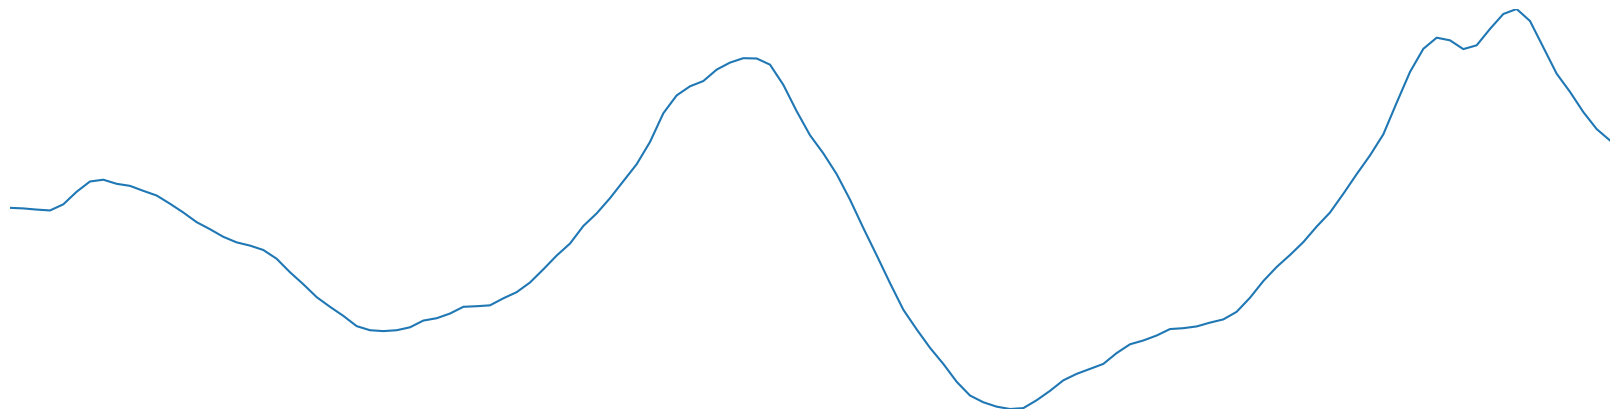

In [42]:
# Plot 2: Selected signal (just the wave, no extras)
plt.figure(figsize=(16, 4))
plt.plot(samples, signal, linewidth=1.5)  # Single wave
plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig('selected_signal.png', bbox_inches='tight', pad_inches=0, transparent=True)

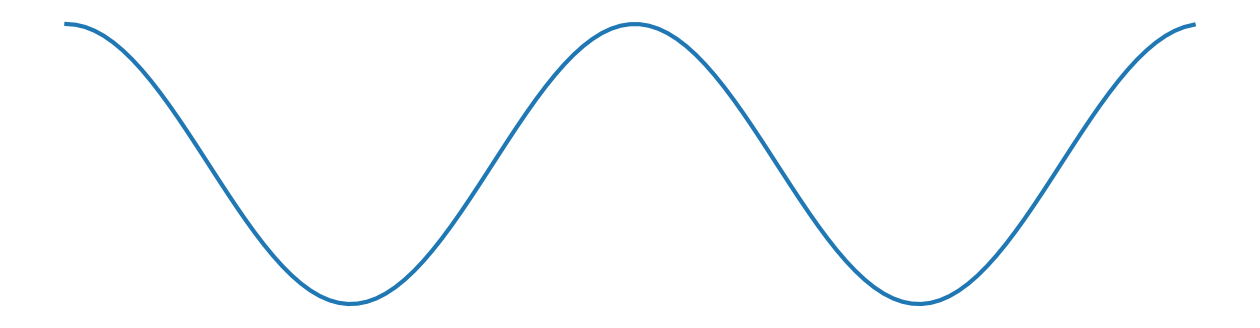

<Figure size 640x480 with 0 Axes>

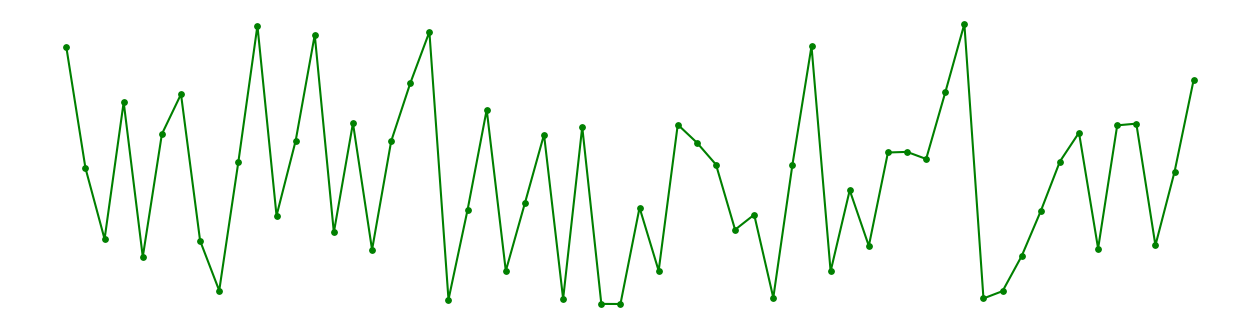

In [47]:
time_window = 2
num_samples = 121
samples = np.linspace(0, time_window, num_samples, endpoint=False)
my_cosine = np.cos(2 * np.pi * samples)
plt.figure(figsize=(16, 4))  # Set figure size BEFORE plotting
plt.axis('off')              # Remove axis
plt.gca().set_axis_off()     # Also remove axis box
plt.plot(samples, my_cosine, linewidth=3)
plt.show()

# Do dft
rfft = np.fft.rfft(my_cosine)
freqs = np.fft.rfftfreq(num_samples, d=time_window / num_samples)

phase = np.arctan2(rfft.imag[1:], rfft.real[1:]) / (2 * np.pi) * 360
plt.clf()
plt.figure(figsize=(16, 4))
plt.plot(freqs[1:], phase, c='g')
plt.scatter(freqs[1:], phase, c='g', s=15)
plt.axis('off') 
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.show()